# Problem Statement
---
XYZ Co's 2021-2025 sales data to identify key revenue and profit drivers across products, channels, and regions, uncover seasonal trends and outliers and align performance aganist budgets. Use these indights to optimize pricing, promotions and market expansions for sustainable growth and reduced concentration risks.


In [9]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [10]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Shows all the columns and increased width
pd.set_option("display.max_columns",None)
pd.set_option("display.width",200)

# Code for importing the xlsx file here
sheets = pd.read_excel("/content/drive/MyDrive/EDA Project data/Regional Sales Dataset.xlsx",sheet_name = None)


In [13]:
# Assigning dataframes to each sheet

df_sales = sheets["Sales Orders"]
df_customer = sheets["Customers"]
df_products = sheets["Products"]
df_regions = sheets["Regions"]
df_state_reg = sheets["State Regions"]
df_budgets = sheets["2024 Budgets"]

In [14]:
# Quick inspection

print("df_sales shape:",(df_sales.shape))
print("df_customer shape:",(df_customer.shape))
print("df_products shape:",(df_products.shape))
print("df_regions shape:",(df_regions.shape))
print("df_state_reg shape:",(df_state_reg.shape))
print("df_budgets shape:",(df_budgets.shape))

df_sales shape: (64104, 12)
df_customer shape: (175, 2)
df_products shape: (30, 2)
df_regions shape: (994, 15)
df_state_reg shape: (48, 3)
df_budgets shape: (30, 2)


In [15]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2021-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2021-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [16]:
df_customer.head()

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [17]:
df_products.head()

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [18]:
df_regions.head()

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [19]:
df_state_reg.head()

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [20]:
df_budgets.head()

,Product Name,2024 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [22]:
# Null value check for each DataFrame

df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [23]:
df_budgets.isnull().sum()

,0
Product Name,0
2024 Budgets,0


In [24]:
df_customer.isnull().sum()

,0
Customer Index,0
Customer Names,0


In [25]:
df_products.isnull().sum()

,0
Index,0
Product Name,0


In [26]:
df_regions.isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


In [27]:
df_state_reg.isnull().sum()

,0
State Code,0
State,0
Region,0


### Data Cleaning & Wrangling

In [28]:
# merge with customers

df = df_sales.merge(df_customer, how = "left",left_on="Customer Name Index", right_on = "Customer Index")

In [29]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2021-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2021-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [30]:
# merge with products

df = df.merge(df_products, how = "left", left_on = "Product Description Index", right_on = "Index")

In [31]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2021-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2021-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [32]:
# Merge with Regions

df = df.merge(df_regions, how = "left", left_on = "Delivery Region Index", right_on = "id")

In [33]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27,364,Savannah,Chatham County,GA,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20,488,Greenwood,Johnson County,IN,Indiana,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2021-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26,155,Pleasanton,Alameda County,CA,California,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2021-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7,473,Bloomington,Monroe County,IN,Indiana,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8,256,Manchester,Hartford County,CT,Connecticut,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [34]:
# Merge with State Regions

df = df.merge(df_state_reg[["State Code","Region"]], how = "left", left_on = "state_code", right_on = "State Code")

In [35]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27,364,Savannah,Chatham County,GA,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20,488,Greenwood,Johnson County,IN,Indiana,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2021-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26,155,Pleasanton,Alameda County,CA,California,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2021-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7,473,Bloomington,Monroe County,IN,Indiana,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8,256,Manchester,Hartford County,CT,Connecticut,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [36]:
# Merge with the Budgets

df = df.merge(df_budgets, how = "left", on="Product Name")

In [37]:
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region,2024 Budgets
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27,364,Savannah,Chatham County,GA,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20,488,Greenwood,Johnson County,IN,Indiana,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120
2,SO - 0005126,2021-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26,155,Pleasanton,Alameda County,CA,California,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270
3,SO - 0005614,2021-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7,473,Bloomington,Monroe County,IN,Indiana,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8,256,Manchester,Hartford County,CT,Connecticut,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,1085037.329


### Cleaning up redundant columns

- Customer Index
- Index
- id
- State Code

In [38]:
cols_to_drop = ["Customer Index","Index","id","State Code"]
df = df.drop(columns = cols_to_drop, errors = "ignore")
df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Names,Product Name,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2024 Budgets
0,SO - 000225,2021-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Savannah,Chatham County,GA,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2021-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Greenwood,Johnson County,IN,Indiana,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2021-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,Pleasanton,Alameda County,CA,California,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2021-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,Bloomington,Monroe County,IN,Indiana,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2021-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,Manchester,Hartford County,CT,Connecticut,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [39]:
# Converting all the columns to lower case for consistency

df.columns = df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2024 budgets'], dtype=object)

In [40]:
# Keeping the important columns and getting rid of the unwanted columns

col_to_keep = ["ordernumber","orderdate","customer names","channel","product name","order quantity","unit price","line total","total unit cost","state_code","county","state","region",
               "latitude","longitude","2024 budgets"]

In [41]:
df = df[col_to_keep]
df.head()

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2024 budgets
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2021-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [42]:
# Rename the columns

df = df.rename( columns={"ordernumber" : "order_number",
                         "orderdate" : "order_date",
                         "customer names" : "customer_names",
                         "product name" : "product_name",
                         "order quantity" : "order_quantity",
                         "unit price" : "unit_price",
                         "line total" : "revenue",
                         "total unit cost" : "cost",
                         "state" : "state_name",
                         "latitude" : "lat",
                         "longitude" : "lon",
                         "2024 budgets" : "budget"})
df.head()

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,county,state_name,region,lat,lon,budget
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2021-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [43]:
# Blanking out budgets for non-2024 orders

df.loc[df["order_date"].dt.year != 2024, "budget"] = pd.NA

df[["order_date", "product_name", "revenue", "budget"]].head()

,order_date,product_name,revenue,budget
0,2021-01-01,Product 27,14994.6,NaN
1,2021-01-01,Product 20,25868.7,NaN
2,2021-01-01,Product 26,5869.2,NaN
3,2021-01-01,Product 7,16368.1,NaN
4,2021-01-01,Product 8,18331.2,NaN


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_number    64104 non-null  object        
 1   order_date      64104 non-null  datetime64[ns]
 2   customer_names  64104 non-null  object        
 3   channel         64104 non-null  object        
 4   product_name    64104 non-null  object        
 5   order_quantity  64104 non-null  int64         
 6   unit_price      64104 non-null  float64       
 7   revenue         64104 non-null  float64       
 8   cost            64104 non-null  float64       
 9   state_code      64104 non-null  object        
 10  county          64104 non-null  object        
 11  state_name      64104 non-null  object        
 12  region          64104 non-null  object        
 13  lat             64104 non-null  float64       
 14  lon             64104 non-null  float64       
 15  bu

### **Feature Engineering**

In [45]:
df.head()

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,county,state_name,region,lat,lon,budget
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN
2,SO - 0005126,2021-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN


In [46]:
df["total_cost"] = df["order_quantity"] * df["cost"]

In [47]:
df["profit"] = df["revenue"] - df["total_cost"]

df["profit_margin_%"] = df["profit"] / df["revenue"] * 100

In [48]:
df.head()

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,county,state_name,region,lat,lon,budget,total_cost,profit,profit_margin_%
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2021-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


## **EDA**

## **1. Monthly Sales Trend Over Time**
**Goal:** Track revenue trends over time to detect seasonality or sales spikes

**Chart:** Line chart

**EDA Type:** Temporal (time series)

**Structure:** Line with markers to highlight monthly revenue points clearly

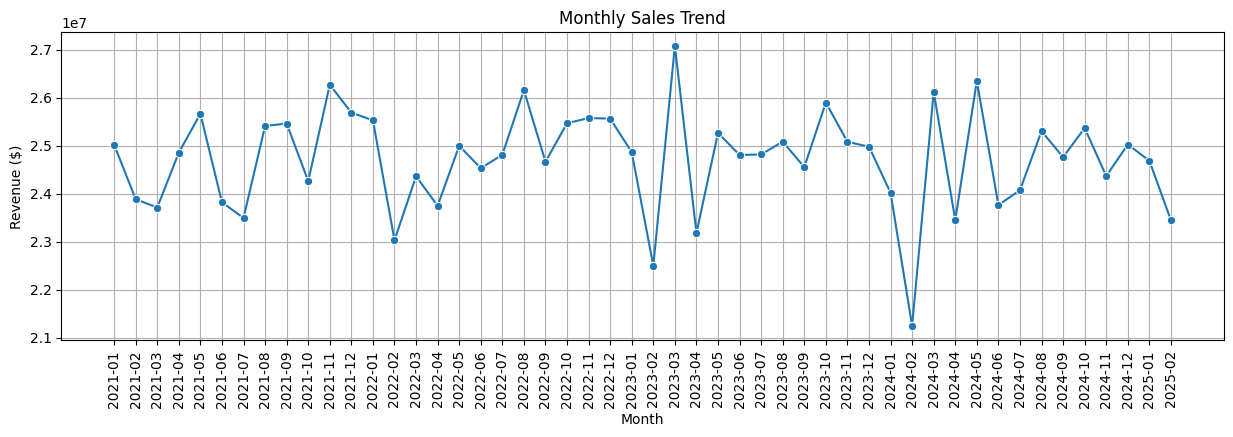

In [49]:
df["order_date"] = pd.to_datetime(df["order_date"])

# Create a month column (optional)
df['year_month'] = df['order_date'].dt.to_period('M')

# Calculate monthly sales (sum of revenue)
monthly_sales = df.groupby('year_month')['revenue'].sum().reset_index()

# Convert period to datetime for plotting
monthly_sales["year_month"] = monthly_sales["year_month"].astype(str)

# Plot the line chart
plt.figure(figsize=(15,4))
sns.lineplot(data=monthly_sales, x="year_month", y="revenue", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

 ### INSIGHTS ---  <br>
* Sales consistently cycle between 24M-26 M, with clear peaks in late spring to early summer (May–June) and troughs each January.

* The overall trend remains stable year over year, reflecting a reliable seasonal demand pattern.

* However, the sharp revenue drop in early 2024 stands out as an outlier, warranting closer investigation into potential causes such as market disruptions or mistimed promotions.





## **2. Monthly Sales Trend (All Years Combined)**
**Goal:** Highlight overall seasonality patterns by aggregating sales across all years for each calendar month

**Chart:** Line chart

**EDA Type:** Temporal (time series)

**Structure:** Line with markers, months ordered January to December based on month number

In [50]:
# Removing the month of Jan and Feb from the year 2025

df["order_date"] = pd.to_datetime(df["order_date"])

df_new = df[~((df["order_date"].dt.year == 2025) & (df["order_date"].dt.month.isin([1,2])))]

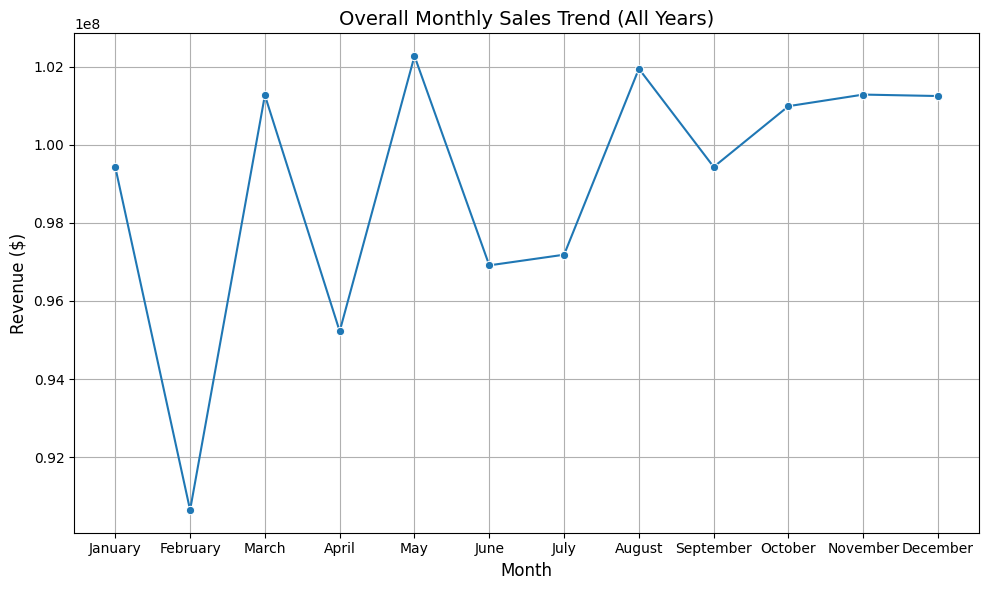

In [51]:
df_new["order_date"] = pd.to_datetime(df_new["order_date"])

df_new["month"] = df_new["order_date"].dt.strftime("%B")

monthly_trend = df_new.groupby("month")["revenue"].sum().reset_index()

month_order = ["January", "February", "March", "April", "May", "June", "July", "August",
               "September", "October", "November", "December"]
monthly_trend["month"] = pd.Categorical(monthly_trend["month"], categories = month_order, ordered = True)
monthly_trend = monthly_trend.sort_values("month")

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_trend, x = "month", y="revenue", marker="o")
plt.title("Overall Monthly Sales Trend (All Years)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()

plt.show()


### INSIGHTS --- <BR>
* Across all years, January begins strong with roughly 99M, followed by a steep decline through April's slowpoint(95 M).

* Sales rebound in May and August (102M) before setting into a plateau of 99–101M from September to December.

* This pattern reveals a strong post–New Year surge, a spring dip, and a mid–summer bump each calendar year.

## **3. Top 10 Products by Revenue (in Millions)**
**Goal:** Identify the highest-grossing products to focus marketing and inventory efforts

**Chart:** Horizontal bar chart

**EDA Type:** Univariate

**Structure:** Bars sorted descending to show top 10 products with revenue scaled in millions

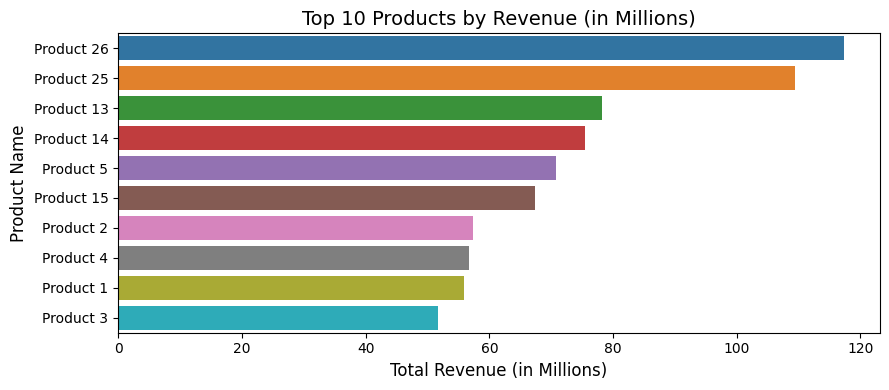

In [65]:
product_revenue = df.groupby("product_name")["revenue"].sum() /1000000

top_10_products = product_revenue.nlargest(10)

plt.figure(figsize=(9,4))
sns.barplot( x= top_10_products.values, y= top_10_products.index, palette="tab10")

plt.title("Top 10 Products by Revenue (in Millions)",fontsize=14)
plt.xlabel("Total Revenue (in Millions)", fontsize=12)
plt.ylabel("Product Name", fontsize=12)

plt.tight_layout()

plt.show()

### INSIGHTS --- <br>
* Products 26 and 25 pull away at 118M and 110M, with a sharp drop to 78M for Product 13 and a tight mid-pack at 68 – 75M.

* The bottom four cluster at 52 - 57 M, highlighting similar constraints.

* Focus on growth pilots for the mid-tier and efficiency gains for the lower earners to drive significant lifts.

## **4. Sales by Channel (Pie Chart)**
**Goal:** Show distribution of total sales across channels to identify dominant sales routes

**Chart:** Pie chart

**EDA Type:** Univariate

**Structure:** Pie segments with percentage labels, colors for clarity, start angle adjusted

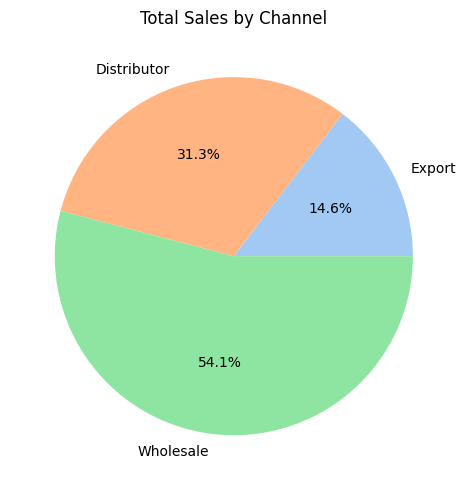

In [53]:
# Sales by Channel

chan_sales = df.groupby("channel")["revenue"].sum().sort_values(ascending=True)

plt.figure(figsize=(5,5))

plt.pie(chan_sales.values,
        labels=chan_sales.index,
        autopct="%1.1f%%",
        colors=sns.color_palette("pastel"))

plt.title("Total Sales by Channel")
plt.tight_layout()

plt.show()


### INSIGHTS --- <br>
* Wholesale accounts for 54 % of sales, with distributors at ~31 % and exports at ~15 %, underscoring reliance on domestic bulk channels.

* To diversify revenue and mitigate concentration risk, prioritize expanding export initiatives—through targeted overseas marketing and strategic partner relationships.

## **5. Average Order Value (AOV) Distribution**
**Goal:** Understand distribution of order values to identify typical spending levels and outliers

**Chart:** Histogram

**EDA Type:** Univariate

**Structure:** Histogram with 50 bins, colored bars with edge highlights to show frequency of order values

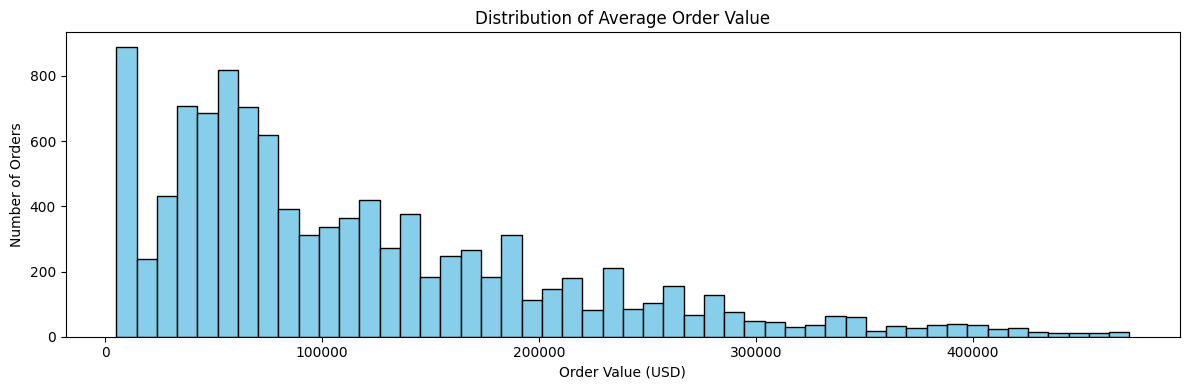

In [54]:
# Average Order Value (AOV) Distribution

aov = df.groupby("order_number")["revenue"].sum()

plt.figure(figsize=(12,4))

plt.hist(aov, bins=50, color="skyblue", edgecolor="black")

plt.title("Distribution of Average Order Value")
plt.xlabel("Order Value (USD)")
plt.ylabel("Number of Orders")

plt.tight_layout()

plt.show()

### INSIGHTS --- <br>
* The order‐value distribution is heavily right‐skewed, with most orders clustering between 20 K and 120 K and a pronounced mode around 50 K - 60 K.

* A long tail of high-value transactions extends up toward 400 K - 500 K, but these large orders represent only a small share of total volume.

## **6. Unit Price Distribution per Product**
**Goal:** Compare pricing variability across different products to identify price consistency and outliers

**Chart:** Boxplot

**EDA Type:** Bivariate

**Structure:** Boxplot with rotated labels to display unit price spread per product


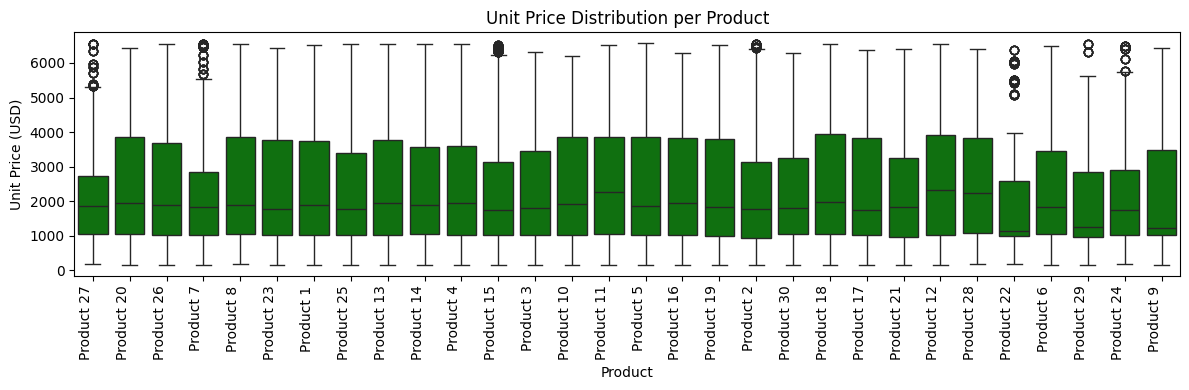

In [55]:
# Unit Price Distribution per Product

plt.figure(figsize=(12,4))

sns.boxplot(data=df, x="product_name", y="unit_price", color="g")

plt.title("Unit Price Distribution per Product")
plt.xlabel("Product")
plt.ylabel("Unit Price (USD)")

plt.xticks(rotation=90, ha="right")

plt.tight_layout()

plt.show()

### INSIGHTS --- <BR>
* Products 8, 17, 27, 20, and 28 show high-end revenue spikes—well above their upper whiskers—likely due to bulk orders, special-edition releases, or premium bundles that temporarily inflate earnings.

* In contrast, deep low-end outliers (near 0 - 100) on Products 20 and 27 suggest promotional giveaways or test SKUs that pull down average prices.

* To ensure accurate margin and pricing assessments, exclude these outlier transactions from average calculations.

* Then assess whether such anomalies warrant formalization as ongoing promotional strategies or should be phased out to stabilize pricing performance.

## **7. Top and Bottom 10 Customers by Revenue**
**Goal:** Identify your highest- and lowest-revenue customers to tailor engagement strategies

**Chart:** Side-by-side horizontal bar charts

**EDA Type:** Multivariate

**Structure:** Left chart shows top 10 customers by revenue (in millions), right chart shows bottom 10 customers by revenue (in millions)

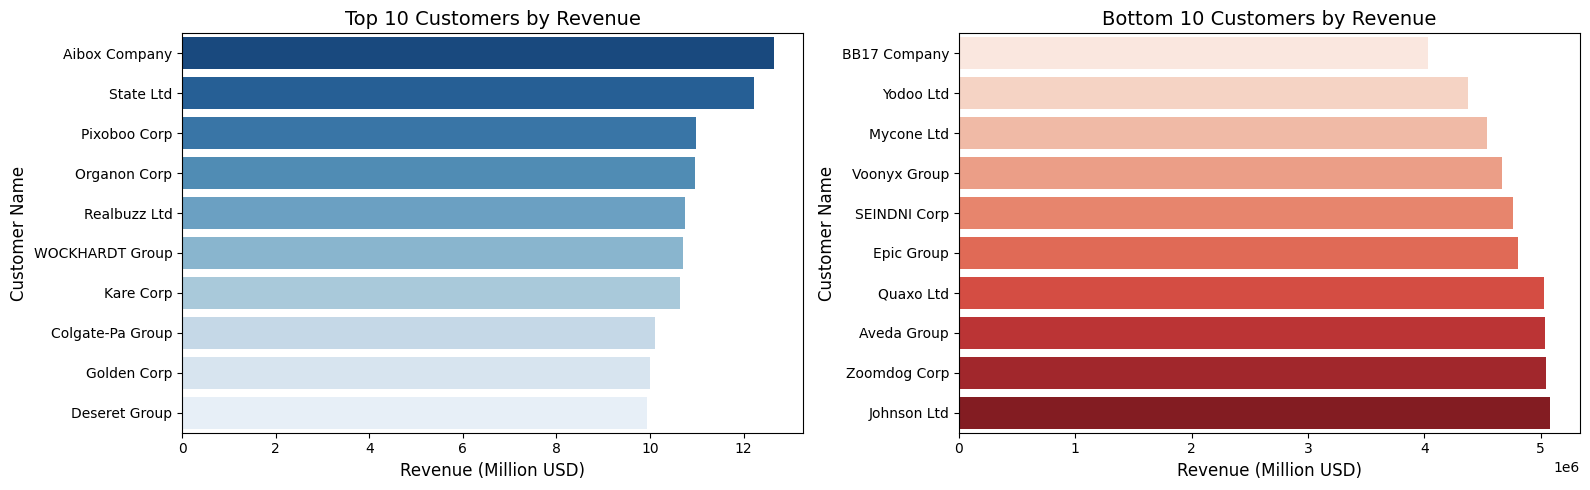

In [66]:
# Top and Bottom 10 Customers by Revenue

top_rev = (df.groupby("customer_names")["revenue"].sum().sort_values(ascending=False).head(10))

bottom_rev = (df.groupby("customer_names")["revenue"].sum().sort_values(ascending=True).head(10))

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

sns.barplot(x=top_rev.values /1e6, y=top_rev.index, palette="Blues_r", ax= axes[0])
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)
axes[0].set_ylabel('Customer Name', fontsize=12)

sns.barplot(x=bottom_rev.values, y=bottom_rev.index, palette='Reds', ax=axes[1])
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)
axes[1].set_ylabel('Customer Name', fontsize=12)

plt.tight_layout()
plt.show()

### INSIGHTS ---<br>
* Aibox Company tops the list with 12.5 M, followed closely by State Ltd (12.2 M), while the 10th-ranked Deseret Group still contributes 9.9 M demonstrating a tight 10–12 M top tier.

* At the bottom, Johnson Ltd leads its group with 5.1 M, down to BB17 Company at 4.1 M roughly half the top customer’s revenue.

* This steep drop from 10 M+ to 4–5 M highlights high revenue concentration among the top customers.

* Action: prioritize retention and upsell for your top ten, and launch targeted growth campaigns to elevate the lower-revenue cohort.

## **8. Average Profit Margin by Channel**
**Goal:** Compare average profit margins across sales channels to identify the most and least profitable routes

**Chart:** Bar chart

**EDA Type:** Bivariate

**Structure:** Vertical bars with data labels showing margin percentages, sorted descending by channel

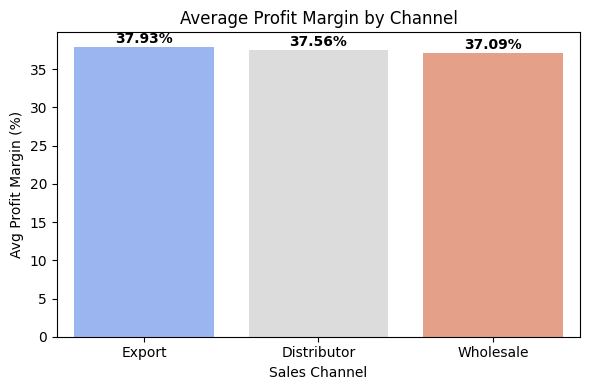

In [57]:
# Average Profit Margin by Channel

channel_margin = (df.groupby('channel')['profit_margin_%'].mean().sort_values(ascending=False))

plt.figure(figsize=(6, 4))

ax = sns.barplot(x=channel_margin.index, y=channel_margin.values, palette='coolwarm')


plt.title('Average Profit Margin by Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Avg Profit Margin (%)')


for i, v in enumerate(channel_margin.values):
    ax.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### INSIGHTS ---<br>
* Export leads with a 37.93 % average margin, closely followed by Distributor (37.56 %) and Wholesale (37.09 %).

* The tiny spread (<0.2 %) shows consistently strong profitability across all channels.

* This uniformity implies well-controlled costs and pricing power everywhere.

* To maximize returns, push volume growth in Export while maintaining efficiency in Distributor and Wholesale.

## **9. Top 10 States by Revenue and Order Count**
**Goal:** Identify highest revenue-generating states and compare their order volumes

**Chart:** Two bar charts

**EDA Type:** Multivariate

**Structure:** First chart shows top 10 states by revenue (in millions), second shows top 10 states by number of orders

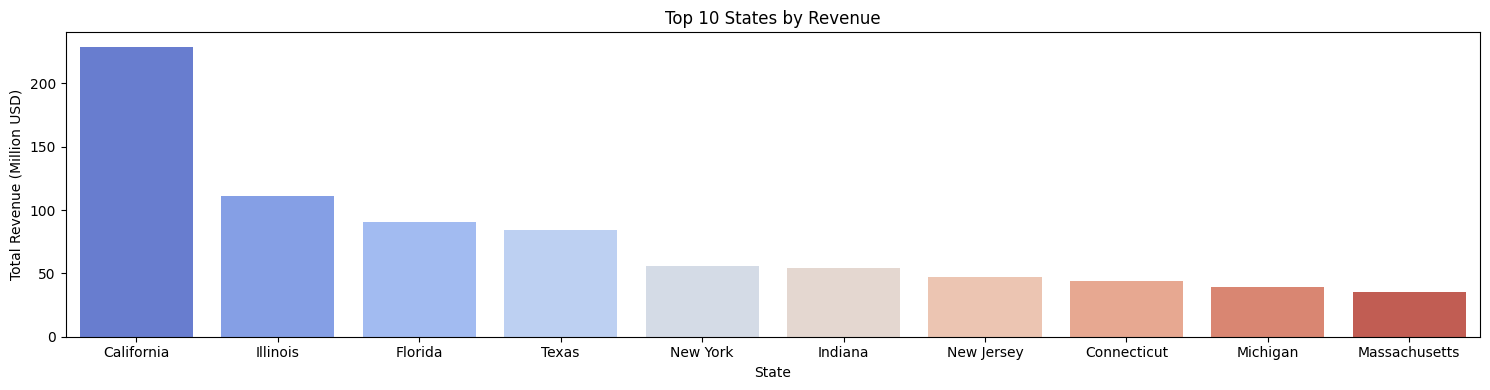

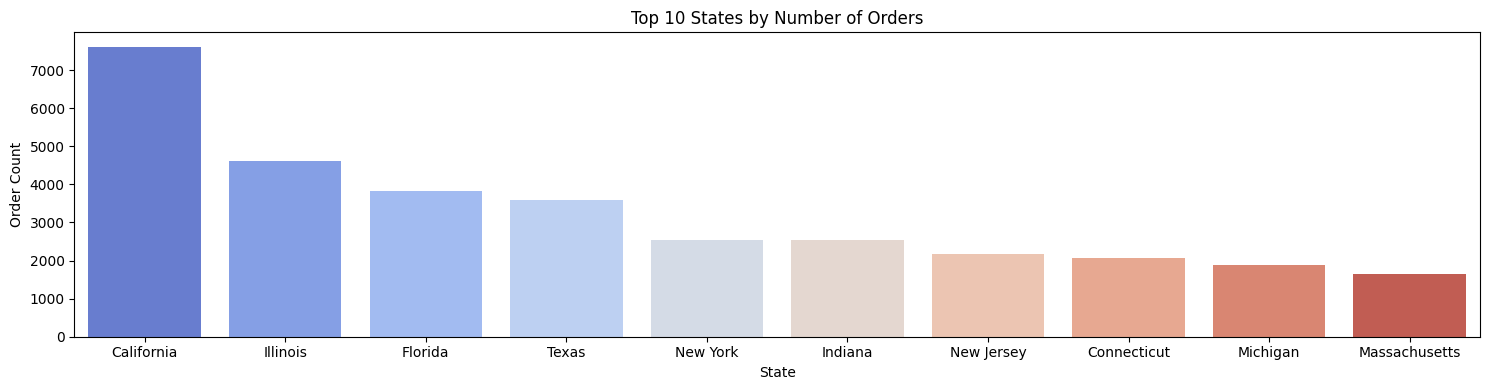

In [58]:
# Top and Bottom 10 customers by revenue

state_rev = df.groupby('state_name').agg(
    revenue=('revenue', 'sum'),          # Sum up revenue per state
    orders=('order_number', 'nunique')   # Count unique orders per state
).sort_values('revenue', ascending=False).head(10)  # Keep top 10 by revenue

# Plot 1: Top 10 states by revenue (scaled to millions)
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['revenue'] / 1e6,        # Y-axis: revenue in millions
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Revenue')     # Chart title
plt.xlabel('State')                       # X-axis label
plt.ylabel('Total Revenue (Million USD)') # Y-axis label
plt.tight_layout()                        # Adjust layout
plt.show()                                # Display the plot

# Plot 2: Top 10 states by number of orders
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['orders'],               # Y-axis: order counts
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Number of Orders')  # Chart title
plt.xlabel('State')                              # X-axis label
plt.ylabel('Order Count')                        # Y-axis label
plt.tight_layout()                               # Adjust layout
plt.show()

## **10. Customer Segmentation: Revenue vs. Profit Margin**
**Goal:** Segment customers by total revenue and average profit margin, highlighting order volume

**Chart:** Bubble chart (scatter plot with variable point sizes)

**EDA Type:** Multivariate

**Structure:** Scatter points sized by number of orders, plotting revenue vs. margin

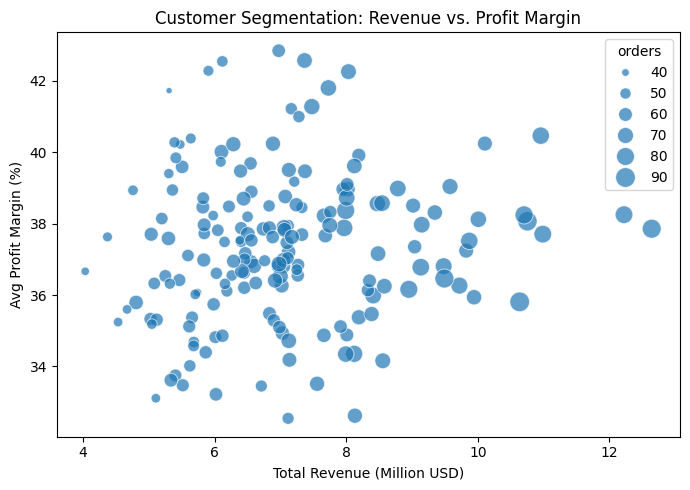

In [59]:
# Customer Segmentation: Revenue vs Profit Margin

# Aggregate metrics per customer
cust_summary = df.groupby('customer_names').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_%', 'mean'),
    orders=('order_number', 'nunique')
)

# Convert revenue to millions
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))

# Bubble chart with revenue in millions
sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()

### INSIGHTS --- <br>
* Customers with > 10 M in revenue tend to sustain margins between 36–40%, indicating that scale does not significantly erode profitability.
* Most customers cluster within the 6–10 M range and show stable margins (34–40%), suggesting consistent pricing in this tier.
* Customers below $6 M display the widest margin variance (33–43%), pointing to more volatile cost structures or discounts among smaller accounts.
* Bubble size (order count) increases with revenue, but margin levels appear unaffected—reinforcing revenue as the dominant performance driver over order volume.

## **11. Correlation Heatmap of Numeric Features**
**Goal:** Identify relationships among key numeric variables to uncover potential multicollinearity

**Chart:** Correlation heatmap

**EDA Type:** Multivariate

**Structure:** Annotated heatmap with correlation coefficients for selected numeric columns

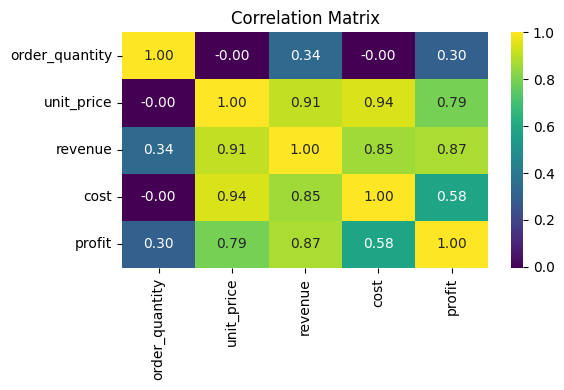

In [60]:
# Correlation Heatmap of Numeric Features

# List numeric columns to include in the correlation calculation
num_cols = ['order_quantity', 'unit_price', 'revenue', 'cost', 'profit']

# Calculate the correlation matrix for these numeric features
corr = df[num_cols].corr()

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot the heatmap with annotations and a viridis colormap
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='viridis'

# Add title for context
plt.title('Correlation Matrix')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the heatmap
plt.show()

### INSIGHTS ---<br>
* Profit and revenue are very strongly correlated (0.87), indicating that as sales value increases, profit tends to rise as well.
* Unit price is a key driver: it correlates 0.91 with revenue, 0.79 with profit, and 0.94 with cost—highlighting how pricing decisions ripple through both top‑line and expense figures.
* Cost shows a strong link to revenue (0.85) but a more moderate tie to profit (0.58), underscoring that while higher sales often bring higher expenses, margins can still vary.
* Quantity has virtually no correlation with unit price or cost (≈0.00) and only modest associations with revenue (0.34) and profit (0.30), making volume a secondary factor compared to pricing.

In [68]:
# Saving Pre Processed Dataframe

df

,order_number,order_date,customer_names,channel,product_name,order_quantity,unit_price,revenue,cost,state_code,county,state_name,region,lat,lon,budget,total_cost,profit,profit_margin_%,year_month
0,SO - 000225,2021-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,2021-01
1,SO - 0003378,2021-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,2021-01
2,SO - 0005126,2021-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,2021-01
3,SO - 0005614,2021-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,2021-01
4,SO - 0005781,2021-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,2021-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2025-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,Bucks County,Pennsylvania,Northeast,40.15511,-74.82877,NaN,11765.736,10022.664,46.0,2025-02
64100,SO - 0007706,2025-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,Cook County,Illinois,Midwest,42.11030,-88.03424,NaN,3474.486,1711.314,33.0,2025-02
64101,SO - 0007718,2025-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,Broward County,Florida,South,26.24453,-80.20644,NaN,29133.610,14349.390,33.0,2025-02
64102,SO - 0008084,2025-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,Erie County,New York,Northeast,42.91002,-78.74182,NaN,20511.246,7206.654,26.0,2025-02


In [69]:
# Exporting Final Dataframe to CSV

df.to_csv("Sales_data(EDA Exported).csv", index=False)

## **Key Insights**
**Monthly Revenue Cycle:**
Revenue stays stable between 23 M - 26.5 M across 2014–2017, with no consistent seasonal spikes. Sharpest drop ($21.2M) occurs in early 2017, indicating a possible one-time disruption.

**Channel Mix:**
Wholesale: 54%. Distributors: 31%. Exports: 15% — opportunity to scale international presence.

**Top Products (Revenue):**
Product 26: 118M; Product 25: 110M; Product 13: 78M; Mid-tier: 68–75M; bottom performers: 52–57M.

**Profit Margins:**
Profit margins range broadly from 18% to 60%, with no strong correlation to unit price. Dense horizontal bands suggest standardized pricing strategies across tiers.

**Seasonal Volume:**
No strong monthly pattern, but slight volume uptick appears around May–June. Early 2017 dip (≈$21.2M) may require investigation.

**Regional Performance:**
California leads: 230M Revenue & 7500+ orders. Illinois/Florida/Texas: ≈
85M–110M & 3500–4500 orders. NY/Indiana: 54M & 2000+ orders.

## **Recommendations**
1. **Outlier Strategy:** Exclude or formalize bulk-order and promotional SKUs when calculating averages.
2. **Margin Uplift:** Apply top-product pricing levers to mid/low tiers; cut costs on underperformers.
3. **Export Growth:** Invest in targeted overseas marketing and distributor partnerships.
4. **Seasonal Planning:** Shift spend toward January trough and May–June peak; investigate the 2017 anomaly.
5. **Dashboard Prep:** Build aggregated tables for time series, channel mix, and product performance for Power BI.